<a href="https://colab.research.google.com/github/vishwajeet1024/Practice-Projects/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# loading the dataset to the pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe['MedHouseVal'] = house_price_dataset.target


In [ ]:
# print first 5 rows of our daraframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# add the target(Price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [ ]:
# changing the number of rows and columns inthe data frame
house_price_dataframe.shape

(20640, 10)

In [ ]:
# check for missig values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0
price,0


In [ ]:
# statical measurers of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


Understanding the correlation

1. Positive Correlation
2. Negative Correlation

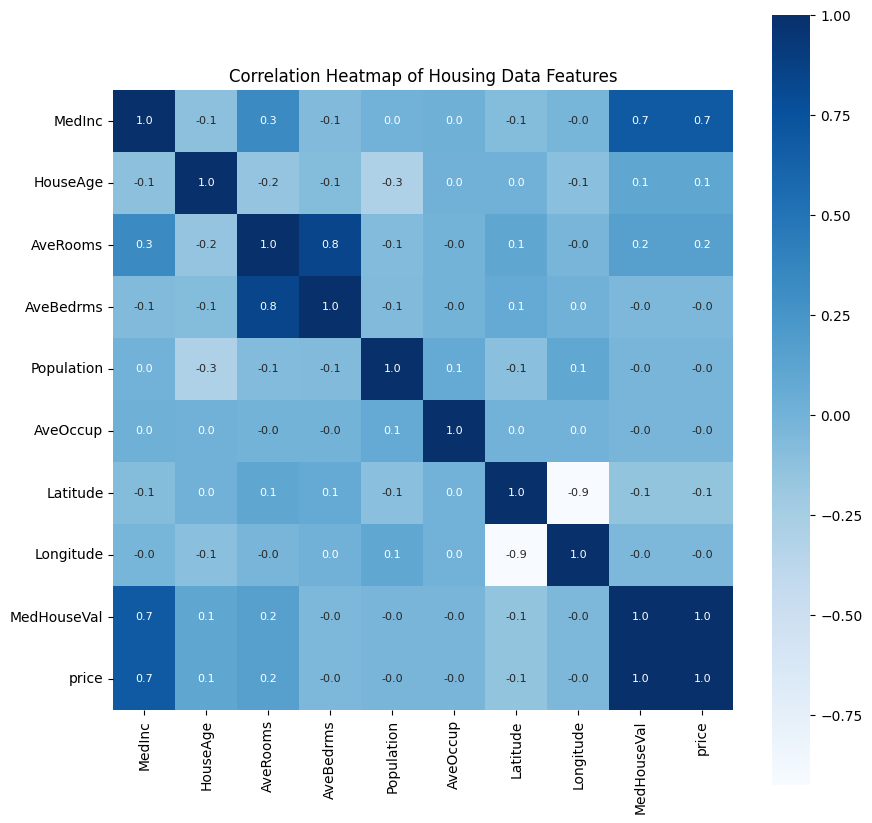

In [ ]:
# constructing a  heatmap to understand the correlation

#calculating the correlation matrix:
correlation_matrix = house_price_dataframe.corr()

#constructing the correlation matrix:
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation_matrix,   # use the calculated parameters:
    cbar=True,            # Show color bar
    square = True,        # Ensurec cells are square
    fmt = '.1f',          # formate numbers to one decimal plate
    annot =True,           # Display annotation (the correlation value)
    annot_kws = {'size':8}, # set annotation font size
    cmap = 'Blues'        # Use 'Blues' color map
)

plt.title('Correlation Heatmap of Housing Data Features')
plt.show()

Splitting the data and the target

In [ ]:
X = house_price_dataframe.drop(['price'], axis = 1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print("----------------------------------")
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

Splitting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 9) (16512, 9) (4128, 9)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()


In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Predicion on training data

In [ ]:
# accuracy for predicting on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.7217324 2.7355433 0.5786305 ... 1.9222438 1.5352833 0.8096097]


In [ ]:
#  R squred error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9999843708817635
Mean Absolute Error :  0.0032788743486385345


Visualizing the actual Prices and predicted prices

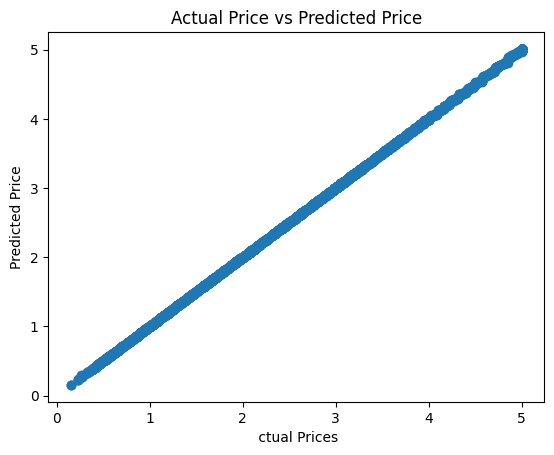

In [ ]:
plt.scatter(Y_train,  training_data_prediction)
plt.xlabel(" ctual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Test data

In [ ]:
# accuracy for predicting on training data
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[2.7792728  2.0662043  0.96131444 ... 1.7631863  0.77990687 2.3611808 ]


In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.999929603126291
Mean Absolute Error :  0.0051191317554730815


Making a predictive system

In [ ]:
input_data = ()

# changining the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

prediction = model.predict(input_data_as_numpy_array)
print(prediction)

XGBoostError: [10:08:11] /workspace/src/predictor/utils.h:20: Check failed: n_features_data == n_features_model (1 vs. 9) : Number of columns in data must equal to the trained model.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7e9482abdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x8e1ac1) [0x7e94830e1ac1]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x912237) [0x7e9483112237]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x9126db) [0x7e94831126db]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x9128b1) [0x7e94831128b1]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x6a3878) [0x7e9482ea3878]
  [bt] (6) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x6f62c9) [0x7e9482ef62c9]
  [bt] (7) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x1ced9c) [0x7e94829ced9c]
  [bt] (8) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x10b) [0x7e94829cf31b]

